In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv(r'C:\Users\shubhamagrawal.NAGARRO\Desktop\Assignment\Assignment\insurance_data.csv')


In [2]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:

#handling sex
df['sex'].replace( 'female',0,inplace=True)
df['sex'].replace('male',1,inplace=True)
#handling sex
df['smoker'].replace( 'yes',0,inplace=True)
df['smoker'].replace('no',1,inplace=True)

In [4]:
import warnings 
warnings.filterwarnings("ignore")
df['region_southeast']=0
df['region_southwest']=0
df['region_northwest']=0
df['region_northeast']=0
for index in range(len(df) ):
    temp_data=df['region'][index]
    if temp_data == 'southeast':
        df['region_southeast'][index]=1
    if temp_data == 'southwest':
        df['region_southwest'][index]=1
    if temp_data == 'northwest':
        df['region_northwest'][index]=1
    if temp_data == 'northeast':
        df['region_northeast'][index]=1

df=df.drop(['region'],axis=1)


        

In [5]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_southeast    0
region_southwest    0
region_northwest    0
region_northeast    0
dtype: int64

In [6]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_southeast      int64
region_southwest      int64
region_northwest      int64
region_northeast      int64
dtype: object

In [7]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_southeast    0
region_southwest    0
region_northwest    0
region_northeast    0
dtype: int64

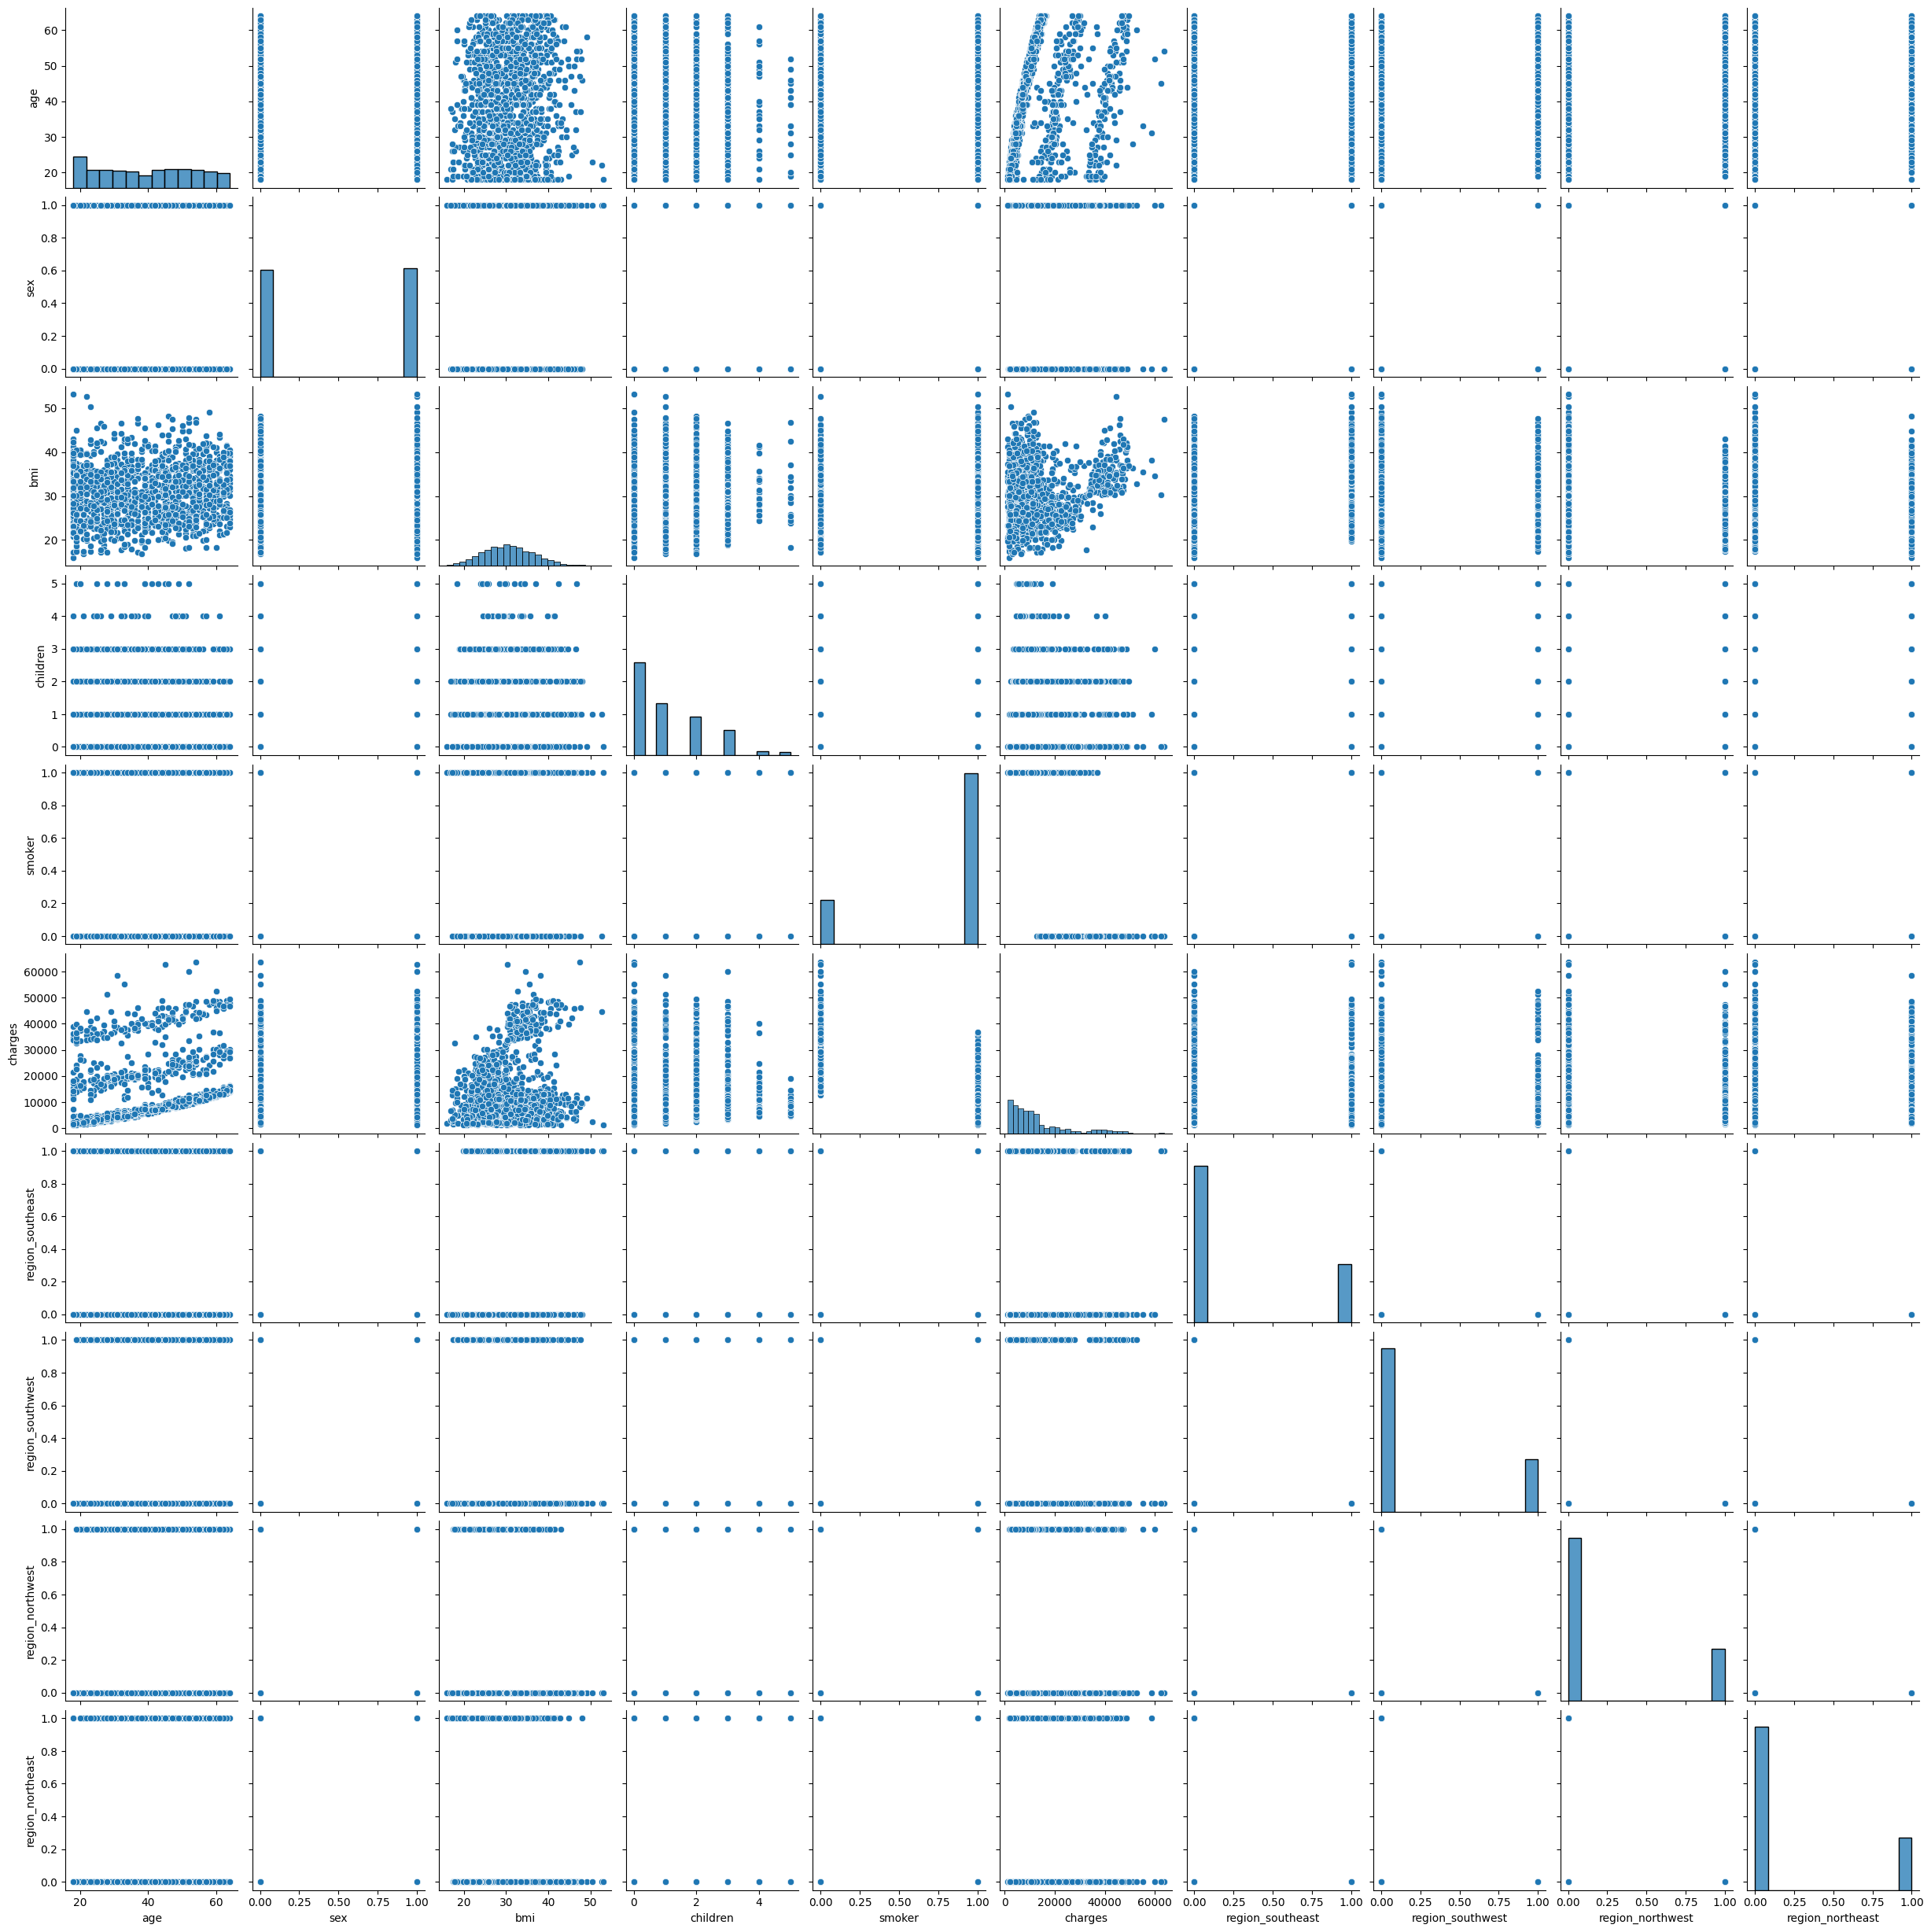

In [8]:
sns.pairplot(df)

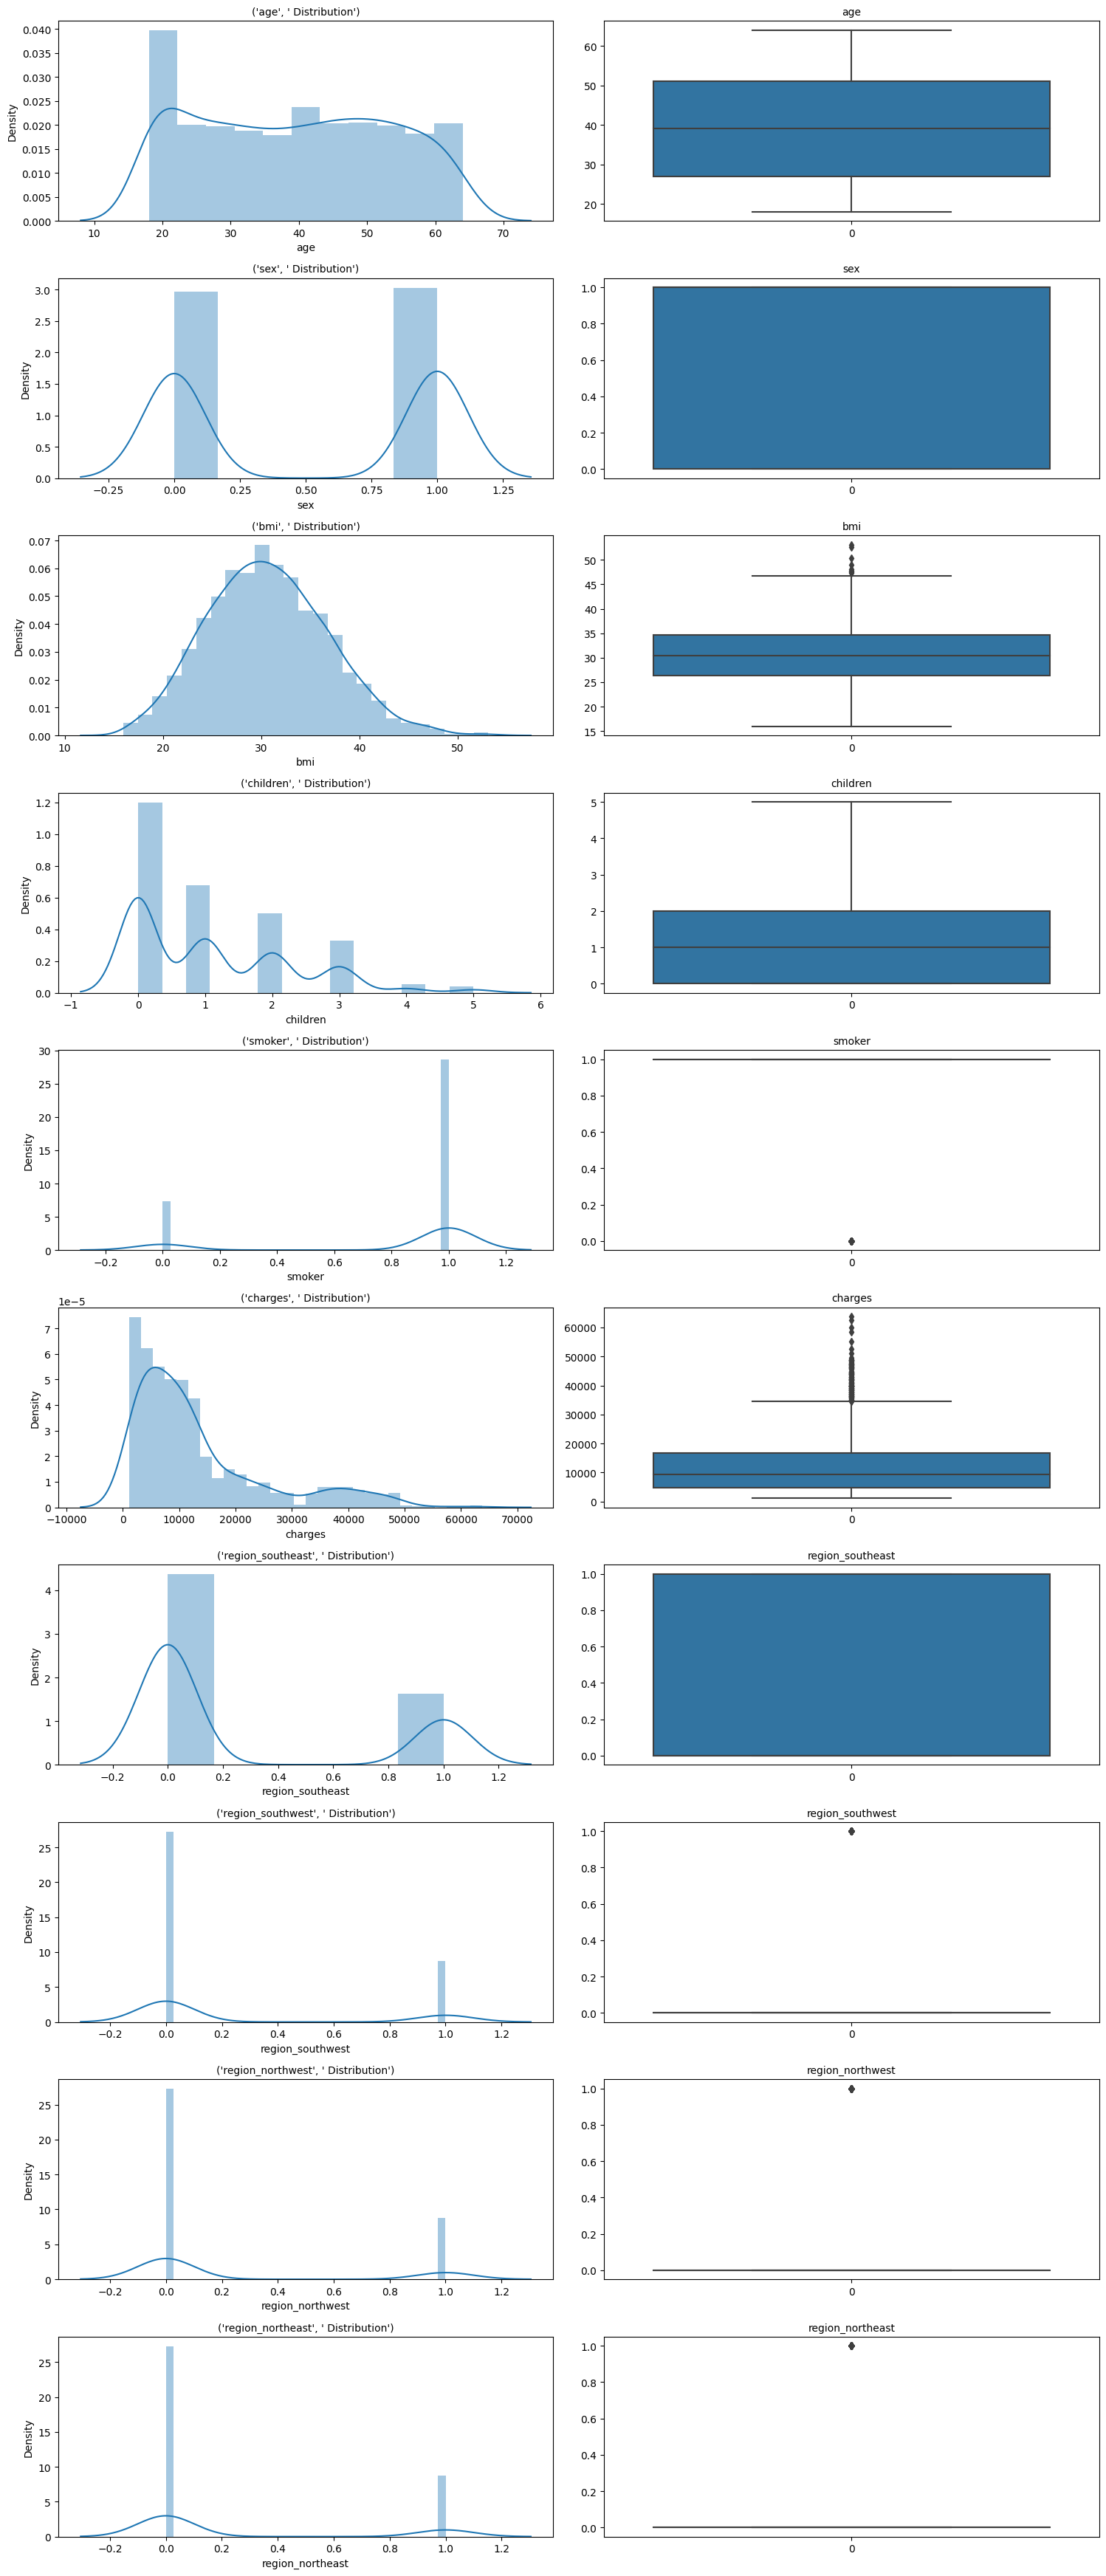

In [9]:

fig, axes = plt.subplots(nrows=len(df.columns),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in df.columns:
    a = sns.distplot(df[i] , ax=axes[count][0],kde=True)
    a.set_title((i," Distribution"),fontsize=10)

    a = sns.boxplot(df[i], orient = "v", ax=axes[count][1])
    a.set_title(i,fontsize=10)

    count+=1

plt.tight_layout()
plt.show()

<AxesSubplot: >

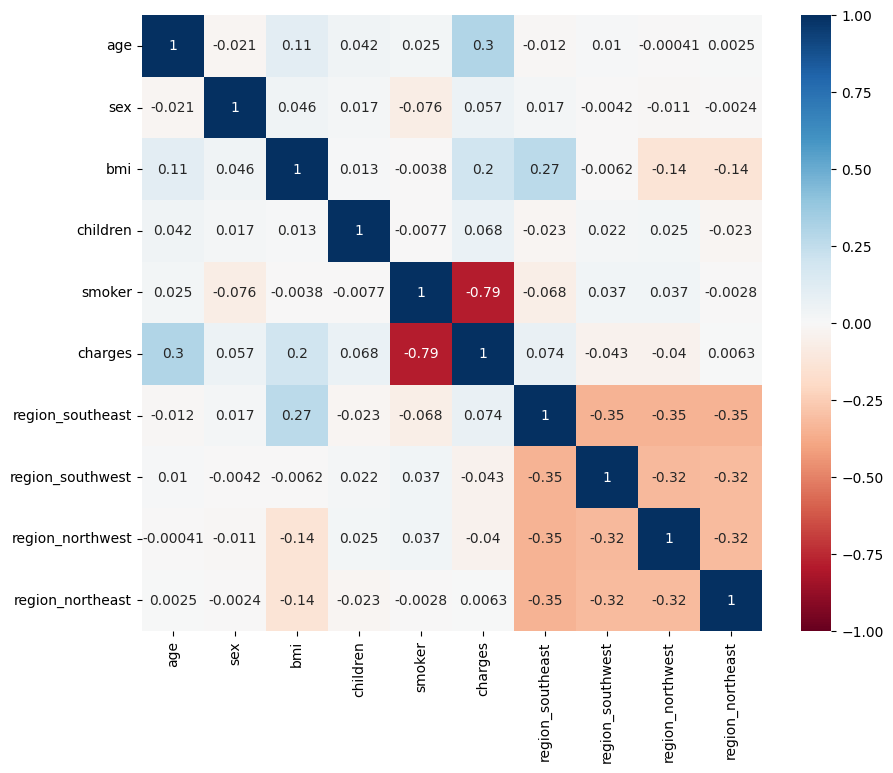

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin = -1 , cmap = 'RdBu' , annot=True)

In [11]:
def outlier_cap(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 -Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range,upper_range

In [12]:
import numpy as np
for column in df.iloc[:,:-1].columns:
    if column =='bmi' or column =='charges':
        lr,ur = outlier_cap(df[column])
        df[column] = np.where(df[column]>ur, ur,df[column])
        df[column] = np.where(df[column]<lr, lr,df[column])

<AxesSubplot: >

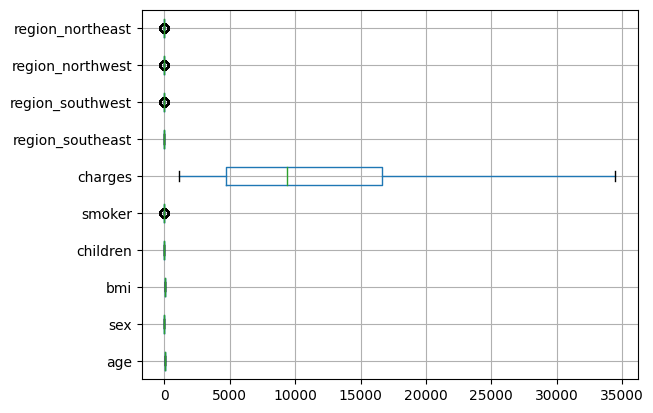

In [13]:
df.boxplot(vert=0)

In [14]:
df.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges,region_southeast,region_southwest,region_northwest,region_northeast
age,1.000000,-0.020856,0.111930,0.042469,0.025019,0.313394,-0.011642,0.010016,-0.000407,0.002475
sex,-0.020856,1.000000,0.044802,0.017163,-0.076185,0.052322,0.017117,-0.004184,-0.011156,-0.002425
bmi,0.111930,0.044802,1.000000,0.013700,-0.003146,0.160996,0.268556,-0.005087,-0.135672,-0.138075
children,0.042469,0.017163,0.013700,1.000000,-0.007673,0.073074,-0.023066,0.021914,0.024806,-0.022808
smoker,0.025019,-0.076185,-0.003146,-0.007673,1.000000,-0.785958,-0.068498,0.036945,0.036945,-0.002811
charges,0.313394,0.052322,0.160996,0.073074,-0.785958,1.000000,0.059990,-0.044267,-0.035204,0.017236
region_southeast,-0.011642,0.017117,0.268556,-0.023066,-0.068498,0.059990,1.000000,-0.346265,-0.346265,-0.345561
region_southwest,0.010016,-0.004184,-0.005087,0.021914,0.036945,-0.044267,-0.346265,1.000000,-0.320829,-0.320177
region_northwest,-0.000407,-0.011156,-0.135672,0.024806,0.036945,-0.035204,-0.346265,-0.320829,1.000000,-0.320177
region_northeast,0.002475,-0.002425,-0.138075,-0.022808,-0.002811,0.017236,-0.345561,-0.320177,-0.320177,1.000000


In [15]:
y=df['charges']
x=df.drop(columns=['charges'])
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
lr_model.coef_

array([   226.41306077,   -127.84558643,    229.27700386,    382.21568274,
       -19838.64335214,   -188.6138256 ,   -329.56612162,     75.92310035,
          442.25684687])

In [19]:
lr_model.intercept_

12056.161232592267

In [20]:
lr_model.score(X_test,y_test)

0.784100215699455

In [21]:
y_pred_test = lr_model.predict(X_test)

In [22]:
RMSE = sqrt(sum((y_pred_test - y_test)**2)/len(y_test))
RMSE

4841.211448763097